### 01 사전 작업 
 * 한글 폰트 적용, konlpy 설치

In [0]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt       # 그래프 그리는 용도

In [0]:
### 나눔 고딕 설치
!apt-get update -qq   # 설치를 업데이트 
!apt-get install fonts-nanum* -qq  # 설치한다. fonts-nanum*

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔 글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


#### 런타임 재기동 후, 다시 시작

In [0]:
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

In [10]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

### konlpy 설치

In [14]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 2.9MB 46.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Hannanum

In [0]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [20]:
# 데이터 읽기
text = open('alice.txt').read()
text

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

In [22]:
type(STOPWORDS)   # 집합

set

In [23]:
stopw = set(STOPWORDS)
len(stopw)   # 190개의 불용어

190

### 02 텍스트 데이터 시각화

In [24]:
# 앨리스 이미지 확인
alice_mask = np.array(Image.open('alice_color.png'))
alice_mask.shape

(800, 600, 4)

In [28]:
# 워드클라우드 표현을 위한 데이터 생성
wc = WordCloud(background_color = 'white',    # 백그라운드 컬러
               max_words = 2000,              # 표시할 최대 단어수
               mask = alice_mask,             # 어떤 이미지와 함께 표시할건지
               contour_width = 3,             # 외곽선 두께
               contour_color = 'steelblue'    # 외곽선 색
               )

wc.generate(text)
wc.words_

{'Alice': 1.0,
 'said': 0.8353909465020576,
 'said Alice': 0.5061728395061729,
 'little': 0.4444444444444444,
 'one': 0.39094650205761317,
 'know': 0.37037037037037035,
 'went': 0.34156378600823045,
 'thing': 0.3292181069958848,
 'time': 0.3168724279835391,
 'Queen': 0.31275720164609055,
 'see': 0.2757201646090535,
 'now': 0.24691358024691357,
 'began': 0.23868312757201646,
 'way': 0.2345679012345679,
 'head': 0.23045267489711935,
 'Mock Turtle': 0.23045267489711935,
 'say': 0.22633744855967078,
 'well': 0.2222222222222222,
 'think': 0.21810699588477367,
 'quite': 0.2139917695473251,
 'much': 0.20987654320987653,
 'first': 0.20987654320987653,
 'thought': 0.205761316872428,
 'go': 0.205761316872428,
 'come': 0.19753086419753085,
 'never': 0.1934156378600823,
 'voice': 0.18930041152263374,
 'looked': 0.18518518518518517,
 'got': 0.18518518518518517,
 'must': 0.18106995884773663,
 'Mouse': 0.18106995884773663,
 'round': 0.16872427983539096,
 'back': 0.1646090534979424,
 'Dormouse': 0.164

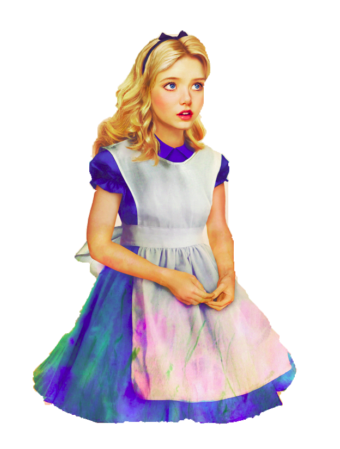

In [29]:
plt.figure(figsize=(15,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')   # interpolation: 이미지의 비어있는 부분의 보관방법
plt.axis('off')
plt.show()

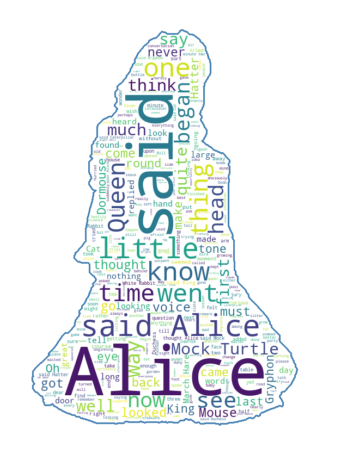

In [32]:
# 위에서 생성한 wc 데이터를 이용하여 그래프 표시
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 03 영화 댓글 시각화

*  분노의 질주 - 댓글 분석

In [0]:
# 01. 파일 불러오기
# 02. nltk를 이용해서 text 생성
# 03. 단어빈도 확인
# 04. 단어빈도 이용한 wordcloud 생성
# 05. 확인

In [70]:
doc_ko = open('15_TheExtreme_utf8.txt').read()
doc_ko[1:1000]

'"x"\n"1" " 분노의 질주 시리즈중에서 제일 별루"\n"2" " 스케일 큰 시끄러운 액션이 난무하는데도 이렇게까지 지루할수 있다니....."\n"3" " 시~원 하게 잘 본 영화. 다음 시리즈에서는 여자 주인공의 비중이 더 높아졌으면 하는 바램!"\n"4" " 반지닦기, 자살닦이, 고무닦이, 정의닦이...로 이어지는 한심한 DC 시리즈 \n레지던트 이블 시리즈 \n그리고 이 영화 분노의 질주 시리즈 \n공통점은 시리즈가 거듭될수록 돈은 많이 들지만 재미는 없어지고 \nCG는 떡질되지만 실감나는 장면은 더 없어지도 뻔히 가짜라는게 드러나는 영화들 \n그러나\n아무리 엉터리로 만들고, 자국에서 망해도 \n미국 블록버스터라면 맹목적으로 보는 중국애들 땜에 \n아무리 쓰레기 영화라도 본전 건지는 것은 물론 상당히 많은 돈을 버니... \n이런 쓰레기들이 매년 양산된다. \n물론, 중국애들도 할말은 있을 거다 \n공산당이 검열하는 자국영화보다는 낫다고... \n하지만 우리들은 다른 전세계의 재미있는 영화를 볼 선택의 자유가 있쟎아! \n왜 이런 쓰레기 영화를 보는 거지?"\n"5" " "\n"6" " 그냥 액션만 보면 멋진데\n스토리는 주인공이 전여친한테 싸지른\n애새끼 구하러 간다며 아빠행세하면서\n그 덕분에 지동료들 다 버리고 미쳐 날뛰는 내용"\n"7" " "\n"8" " 아래는 다들 평점 알바들인가부네.. 이런 개 쓰레기 영화가 평점이 이리 높다니"\n"9" " "\n"10" " "\n"11" " "\n"12" " "\n"13" " "\n"14" " "\n"15" " 스케일은 점점 더 커지지만, 액션은 멍청할정도로 어이가없음 과유불급"\n"16" " 이 시리즈로 이렇게 길게 간다는게 신기.. 새로울 건 없지만 달리는 걸 좋아하시는 분이라면 "\n"17" " "\n"18" " "\n"19" " "\n"20" " 대머리들은 TV물로 찍고,\n감독은 CG실에서 이어붙히고."\n"21" " "\n"22" " "\n"23" " "\n"24" " "\n"25" " 

In [0]:
# OKT 클래스를 이용한 명사확인
from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

In [72]:
# nltk.Text()를 이용하여 nltk가 가지는 많은 기능을 사용 가능해짐
ko = nltk.Text(doc_nouns, name='분노의 질주')
print(len(ko.tokens))   # ko의 명사(token) 길이 확인
print(type(ko))

4286
<class 'nltk.text.Text'>


In [73]:
# 단어들의 사용 횟수 확인 - 빈도 분석
most_fre = ko.vocab().most_common(50)
most_fre

[('영화', 157),
 ('액션', 149),
 ('시리즈', 70),
 ('분노', 62),
 ('스토리', 57),
 ('질주', 55),
 ('최고', 44),
 ('자동차', 40),
 ('생각', 37),
 ('편', 37),
 ('더', 36),
 ('그냥', 33),
 ('역시', 32),
 ('좀', 31),
 ('폴', 31),
 ('워커', 30),
 ('그', 28),
 ('장면', 26),
 ('이', 25),
 ('것', 25),
 ('가족', 24),
 ('점', 24),
 ('기대', 24),
 ('재미', 23),
 ('내용', 23),
 ('볼', 22),
 ('시간', 22),
 ('보고', 22),
 ('스케일', 21),
 ('진짜', 21),
 ('이번', 21),
 ('볼거리', 20),
 ('정말', 20),
 ('마지막', 19),
 ('액션영화', 19),
 ('돈', 18),
 ('이제', 18),
 ('또', 18),
 ('분노의질주', 17),
 ('사람', 16),
 ('다음', 15),
 ('평점', 15),
 ('정도', 15),
 ('대박', 15),
 ('말', 15),
 ('때', 15),
 ('중간', 15),
 ('전편', 15),
 ('눈', 14),
 ('스트레스', 14)]

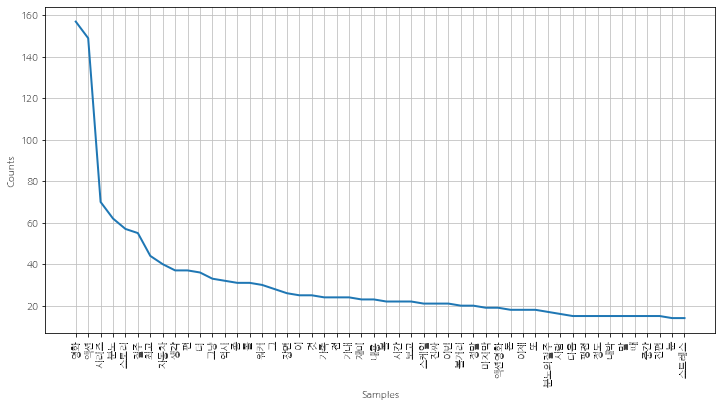

In [75]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [0]:
# 불용어사전 만들기
stop_words = ['분노','영화','더','그','이','것','분노의질주']
new_ko=[]   # 빈 리스트 (가용어사전)
for one_word in ko:
  if one_word not in stop_words:   # 불용어가 아닌 것
    new_ko.append(one_word)        # 추가

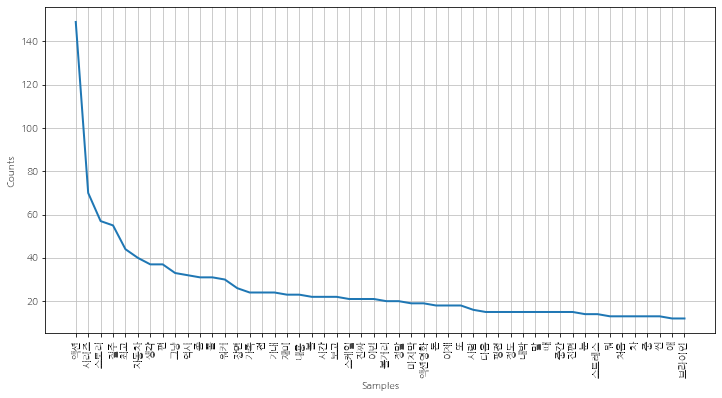

In [77]:
# nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name='분노의 질주2')
plt.figure(figsize=(12,6))
new_ko.plot(50)

In [0]:
data = new_ko.vocab().most_common(1000)

In [0]:
car_mask = np.array(Image.open('Draw_car1.png'))

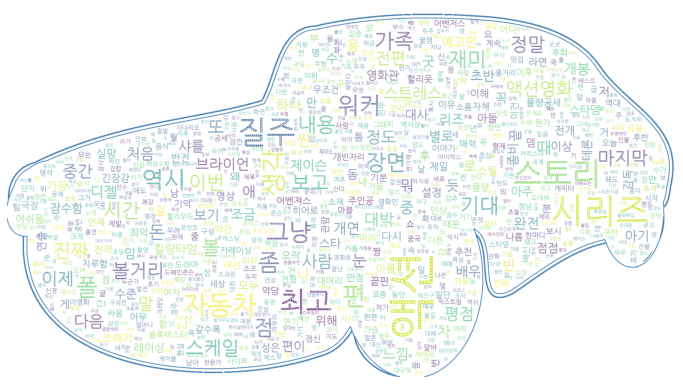

In [82]:
# 워드 클라우드 표현을 위한 데이터 생성
wc = WordCloud(background_color='white', 
               max_words=1000,
               mask=car_mask,   
               contour_width=3, 
               contour_color="steelblue", 
               font_path=path).generate_from_frequencies(dict(data))   # 불용어 빼고 단어의 빈도로

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()